In [7]:
#initializing modules and loading data from dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('coffee_sales.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df['date'] = pd.to_datetime(df['date'])                 #date column to date in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])         #datetime column to datetime in datetime format

#extract time features
df['hour'] = df['datetime'].dt.hour                     #extract hour from datetime, 0-23 for each hour of the day
df['day_of_week'] = df['date'].dt.dayofweek             #extract the day of the week from date, mon-sun:0-6
df['month'] = df['date'].dt.month                       #extract month from date, jan-dec:1-12

#transform categorical features
le = LabelEncoder()
df['coffee_name'] = le.fit_transform(df['coffee_name']) #encode coffee type
df['cash_type'] = le.fit_transform(df['cash_type'])     #encode cash type

#generate aggregated daily data for prediction
daily_data = df.groupby('date').agg({
    'money': 'sum',                                     #total revenue per day
    'coffee_name': 'count',                             #total orders per day    
    'hour': ['mean', 'max'],                            #avg hr or the mean of time of transaction and peak hr per day
    'day_of_week': 'first',                             #day of the week for each date
    'month': 'first',                                   #month for each date
    'cash_type': 'mean'                                 #card to cash use ratio per day where 1 is card and 0 is cash
}).reset_index()

#setting column names
daily_data.columns = ['date', 
                     'daily_revenue', 
                     'daily_orders', 
                     'avg_hour', 
                     'peak_hour', 
                     'day_of_week', 
                     'month', 
                     'card_usage_ratio']

#display
daily_data.head()

,date,daily_revenue,daily_orders,avg_hour,peak_hour,day_of_week,month,card_usage_ratio
0,2024-03-01,396.3,11,15.090909,19,4,3,0.000000
1,2024-03-02,228.1,7,12.571429,17,5,3,0.142857
2,2024-03-03,349.1,10,14.400000,18,6,3,0.100000
3,2024-03-04,135.2,4,11.250000,14,0,3,0.000000
4,2024-03-05,338.5,9,15.888889,18,1,3,0.000000


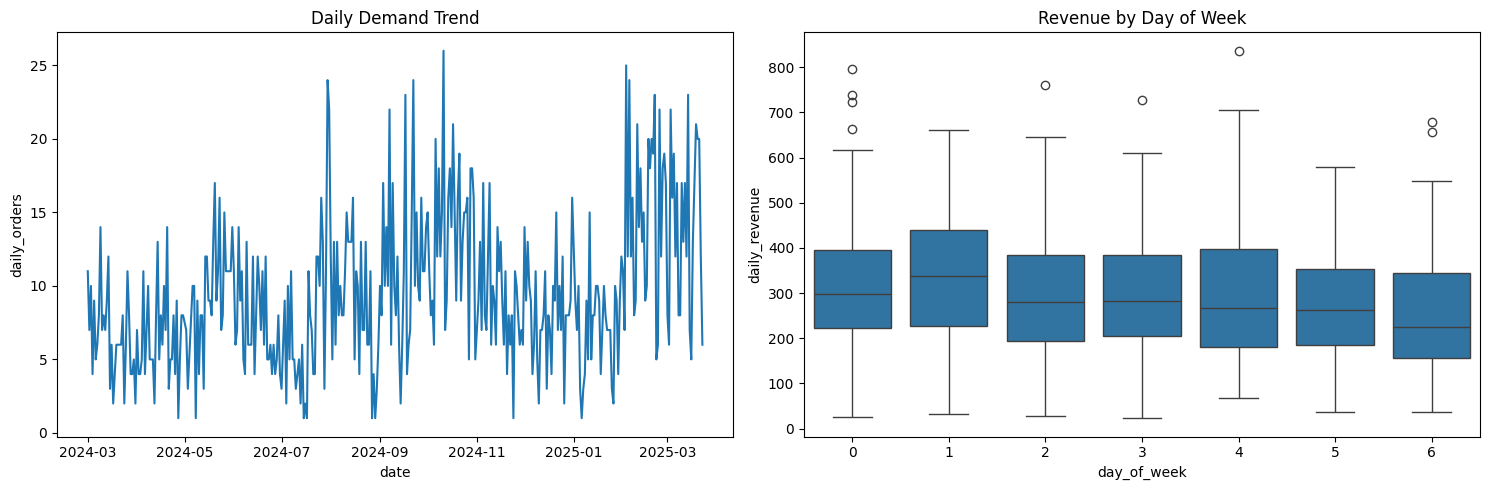

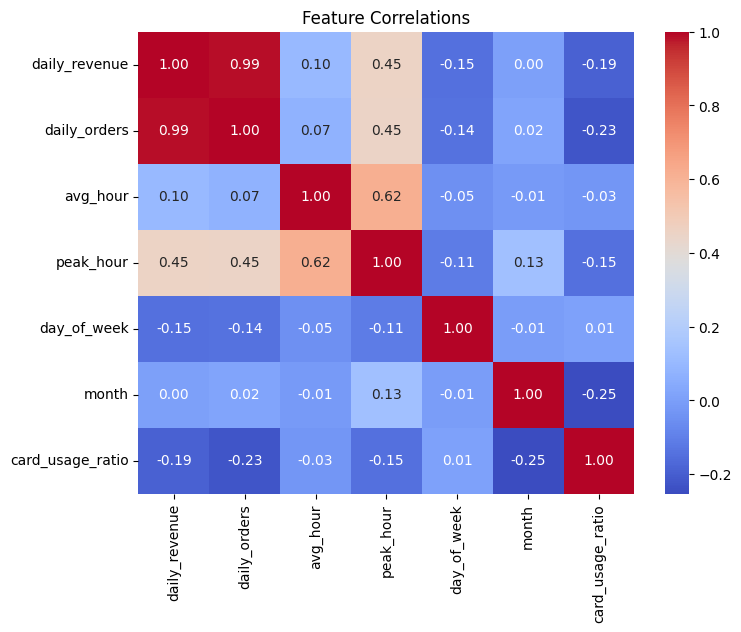

In [10]:
plt.figure(figsize=(15, 5))                             #set the size of the plot wxh   

#plot date against volume of orders
plt.subplot(1, 2, 1)                                    #allocates a 1x2 grid for the separate plots, sets this plot to first index
sns.lineplot(                                           #create a line plot
            data=daily_data,                            #set which data to use
            x='date',                                   #set x axis for date
            y='daily_orders')                           #set y axis for daily orders
plt.title('Daily Demand Trend')                         #titles the plot

#plot revenue by day of the week
plt.subplot(1, 2, 2)                                    #set this plot to the second index in the subplot
sns.boxplot(                                            #create a box plot
            data=daily_data,                            
            x='day_of_week', 
            y='daily_revenue')
plt.title('Revenue by Day of Week')
plt.tight_layout()                                      #ensure no overlaps, etc. in the plot created
plt.show()                                              #display the plot

#plot correlation between values
plt.figure(figsize=(8, 6))
sns.heatmap(
    daily_data.corr(numeric_only=True),                 #essentially compute numeric correlation between values present in daily_data
    annot=True,                                         #display correl values in each cell
    cmap='coolwarm',                                    #set the color map cool (negative) -> warm (positive)
    fmt=".2f")                                          #set the displayed values to 2 decimal places
plt.title('Feature Correlations')
plt.show()